In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 25

### Pseudo-$\chi^2$ loss landscape

In [6]:
# Load pseudo-chi2 data
a_b_chi2           = np.load('../flow_data/flow_data_pseudo_chi2_fixed_bin_a_b_Nbatch_2e5.npy')
a_b_gradients_chi2 = np.load('../flow_data/flow_data_pseudo_chi2_fixed_bin_a_b_gradients_Nbatch_2e5.npy')
loss_grid_chi2     = np.load('../flow_data/flow_data_pseudo_chi2_fixed_bin_losses_Nbatch_2e5.npy')

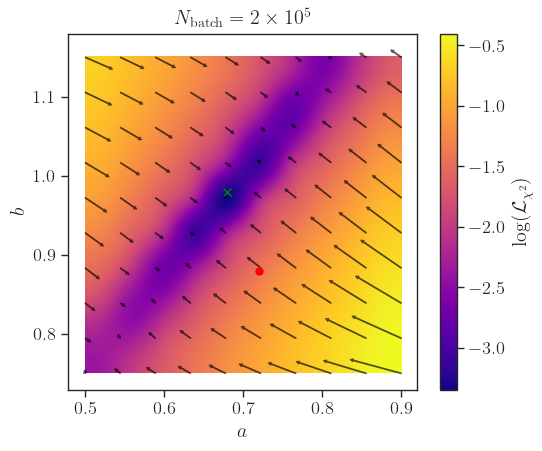

In [49]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

# Calculate the magnitude of each vector in a_b_gradients
magnitudes = np.linalg.norm(a_b_gradients_chi2, axis=1)

# Set the background color based on the normalized magnitude
norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
magnitudes_grid = magnitudes.reshape(grid_shape).T

# Create a heatmap of the gradient magnitudes
heatmap = ax.imshow((np.log10(loss_grid_chi2)).reshape(grid_shape).T, cmap=cmap, origin='lower', extent=(np.min(a_b_chi2[:, 0]), np.max(a_b_chi2[:, 0]), np.min(a_b_chi2[:, 1]), np.max(a_b_chi2[:, 1])), interpolation='spline36')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax, label=r'$\log (\mathcal{L}_{\chi^2})$')

# Plot arrows for each point and direction
for point, gradient in zip(a_b_chi2, a_b_gradients_chi2):
    ax.arrow(point[0], point[1], -gradient[0]/1e2, -gradient[1]/1e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.5)

# Plot the target and base points
a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', label = 'Target', ms = 6, linewidth=10)
base = np.array([0.72, 0.88])
ax.plot(base[0], base[1], 'o', color = 'red', label = 'Base', ms = 5, linewidth=10)

# Set title and labels
ax.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')

fig.tight_layout()
#fig.savefig('ARRG_flow_psuedo_chi2_loss_fixed_bin_high_res_Nbatch_2e5.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
#fig.savefig('ARRG_flow_psuedo_chi2_loss_fixed_bin_high_res_Nbatch_2e5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Pseudo-$\chi^2$ loss landscape with high-resolution patch

In [13]:
# Connect the above plot to a high-res version centered on the target region
a_b_chi2_hr           = np.load('../flow_data/flow_data_pseudo_chi2_fixed_bin_high_res_a_b_Nbatch_2e5.npy')
a_b_gradients_chi2_hr = np.load('../flow_data/flow_data_pseudo_chi2_fixed_bin_high_res_a_b_gradients_Nbatch_2e5.npy')
loss_grid_chi2_hr     = np.load('../flow_data/flow_data_pseudo_chi2_fixed_bin_high_res_losses_Nbatch_2e5.npy')

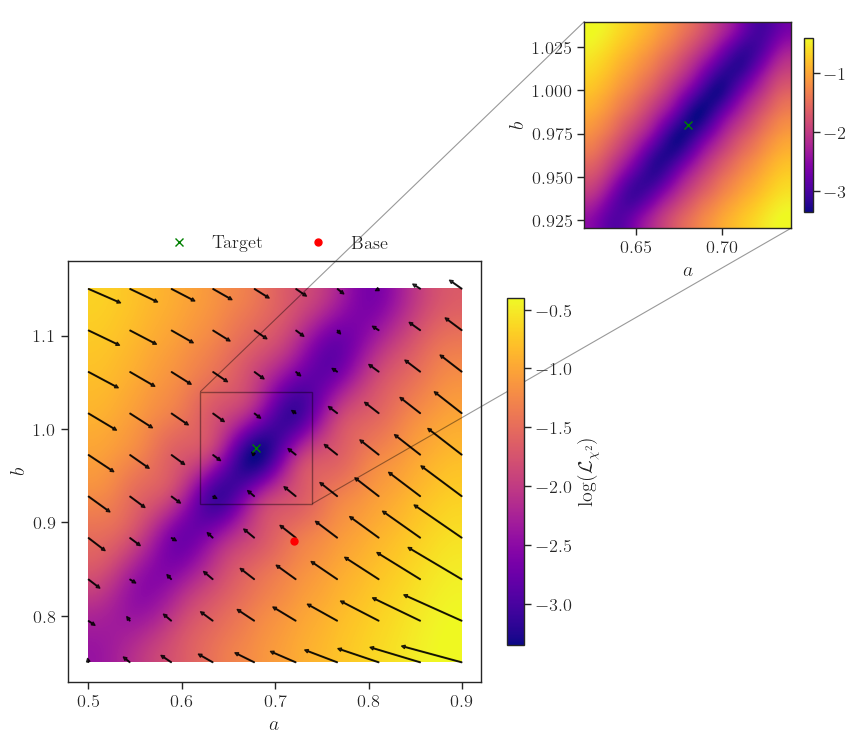

In [119]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,9), gridspec_kw={'height_ratios':[0.5, 1.0], 'width_ratios':[1, 0.5]})

# Get rid of superfluous axes
ax1.axis('off')
ax4.axis('off')

# Calculate the magnitude of each vector in a_b_gradients
magnitudes = np.linalg.norm(a_b_gradients_chi2, axis=1)

# Set the background color based on the normalized magnitude
norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
magnitudes_grid = magnitudes.reshape(grid_shape).T

# Create a heatmap of the gradient magnitudes
heatmap = ax3.imshow((np.log10(loss_grid_chi2)).reshape(grid_shape).T, cmap=cmap, origin='lower', extent=(np.min(a_b_chi2[:, 0]), np.max(a_b_chi2[:, 0]), np.min(a_b_chi2[:, 1]), np.max(a_b_chi2[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax3, label=r'$\log (\mathcal{L}_{\chi^2})$', shrink=0.75)

import matplotlib.patches as patches

# Plot arrows for each point and direction
for point, gradient in zip(a_b_chi2, a_b_gradients_chi2):
    ax3.arrow(point[0], point[1], -gradient[0]/1e2, -gradient[1]/1e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.8)

# Plot the target and base points
a_b_target = np.array([0.68, 0.98]) # Monash
ax3.plot(a_b_target[0], a_b_target[1], 'x', color='green', ms = 6, linewidth=10, label = r'$\mathrm{Target}$')
base = np.array([0.72, 0.88])
ax3.plot(base[0], base[1], 'o', color = 'red', ms = 5, linewidth=10, label = r'$\mathrm{Base}$')

# Set the axis labels
ax3.set_xlabel(r'$a$')
ax3.set_ylabel(r'$b$')

# Add a legend
pos = ax3.get_position()
ax3.set_position([pos.x0, pos.y0, pos.width, pos.height])
ax3.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1),
    ncol=2,
    frameon=False
)

# High-resolution pop out 

# Calculate the magnitude of each vector in a_b_gradients
magnitudes_hr = np.linalg.norm(a_b_gradients_chi2_hr, axis=1)

# Set the background color based on the normalized magnitude
norm_hr = mcolors.Normalize(vmin=np.min(magnitudes_hr), vmax=np.max(magnitudes_hr))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape_hr = (int(np.sqrt(len(magnitudes_hr))), int(np.sqrt(len(magnitudes_hr))))
magnitudes_grid_hr = magnitudes_hr.reshape(grid_shape_hr).T

# Create a heatmap of the gradient magnitudes
heatmap_hr = ax2.imshow((np.log10(loss_grid_chi2_hr)).reshape(grid_shape_hr).T, cmap=cmap, origin='lower', extent=(np.min(a_b_chi2_hr[:, 0]), np.max(a_b_chi2_hr[:, 0]), np.min(a_b_chi2_hr[:, 1]), np.max(a_b_chi2_hr[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax2, shrink=0.75)

# Mark the target point
ax2.plot(a_b_target[0], a_b_target[1], 'x', color='green', label = 'Target', ms = 6, linewidth=10)

# Set the axis labels
ax2.set_xlabel(r'$a$')
ax2.set_ylabel(r'$b$')

# Add rectangle denoting high res region
rect = patches.Rectangle((0.62, 0.92), 0.12, 0.12, linewidth=1, edgecolor='black', facecolor='none', alpha = 0.4)
# Add the patch to the Axes
ax3.add_patch(rect)

plt.subplots_adjust(wspace=0.0, hspace=0.0)

from matplotlib.patches import ConnectionPatch

# Add the connecting lines
conn = ConnectionPatch(
    xyA=(0.62, 0.92 + 0.12), coordsA='data', axesA=ax3,
    xyB=(np.min(a_b_chi2_hr[:, 0]), np.max(a_b_chi2_hr[:, 1])), coordsB='data', axesB=ax2,
    color='black', alpha = 0.4
)
ax3.add_artist(conn)
conn.set_in_layout(False) # Remove from layout calculations

conn1 = ConnectionPatch(
    xyA=(0.62 + 0.12, 0.92), coordsA='data', axesA=ax3,
    xyB=(np.max(a_b_chi2_hr[:, 0]), np.min(a_b_chi2_hr[:, 1])), coordsB='data', axesB=ax2,
    color='black', alpha = 0.4
)
ax3.add_artist(conn1)
conn1.set_in_layout(False) # Remove from layout calculations

#fig.savefig('ARRG_flow_psuedo_chi2_loss_Nbatch_2e5.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
#fig.savefig('ARRG_flow_psuedo_chi2_loss_Nbatch_2e5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Macroscopic 1D EMD (multiplicity) loss landscape

In [120]:
# Load data for the macroscopic 1d wasserstein
a_b_mult_EMD           = np.load('../flow_data/flow_data_wass1d_macro_fixed_bin_a_b_Nbatch_2e5.npy')
a_b_gradients_mult_EMD = np.load('../flow_data/flow_data_wass1d_macro_fixed_bin_a_b_gradients_Nbatch_2e5.npy')
loss_grid_mult_EMD     = np.load('../flow_data/flow_data_wass1d_macro_fixed_bin_losses_Nbatch_2e5.npy')

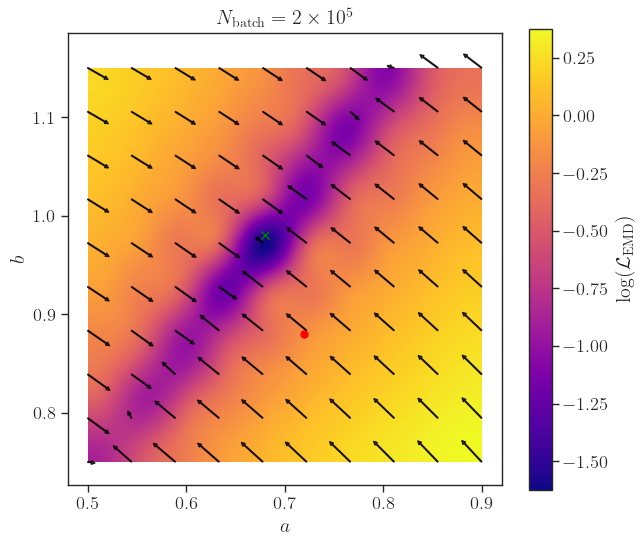

In [129]:
fig, ax = plt.subplots(1,1,figsize=(7,6))

# Calculate the magnitude of each vector in a_b_gradients
magnitudes = np.linalg.norm(a_b_gradients_mult_EMD, axis=1)

# Set the background color based on the normalized magnitude
norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
cmap = plt.cm.plasma  # Choose a colormap

# Assuming magnitudes can be reshaped into a grid directly for simplicity
grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
magnitudes_grid = magnitudes.reshape(grid_shape).T

# Create a heatmap of the gradient magnitudes
heatmap = ax.imshow((np.log10(loss_grid_mult_EMD)).reshape(grid_shape).T, cmap=cmap, origin='lower', extent=(np.min(a_b_mult_EMD[:, 0]), np.max(a_b_mult_EMD[:, 0]), np.min(a_b_mult_EMD[:, 1]), np.max(a_b_mult_EMD[:, 1])), interpolation='lanczos')

# Add a colorbar to show the magnitude scale
fig.colorbar(heatmap, ax=ax, label=r'$\log (\mathcal{L}_{\mathrm{EMD}})$')

# Plot arrows for each point and direction
for point, gradient in zip(a_b_chi2, a_b_gradients_chi2):
    ax.arrow(point[0], point[1], -gradient[0]/8e2, -gradient[1]/8e2, head_width=0.004, head_length=0.004, fc='black', ec='black', alpha = 0.8)

a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', label = 'Target', ms = 6, linewidth=10)
base = np.array([0.72, 0.88])
ax.plot(base[0], base[1], 'o', color = 'red', label = 'Base', ms = 5, linewidth=10)

ax.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')

fig.tight_layout()
#fig.savefig('ARRG_flow_wass1d_macro_loss_Nbatch_2e5.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
#fig.savefig('ARRG_flow_wass1d_macro_loss_Nbatch_2e5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [3]:
# Import the multiplicity data 
mult_target_PATH = "./observable_figs/data/pgun_qqbar_hadrons_mult_a_0.68_b_0.98_PH_vs_IS_1e6.dat"
mult_base_PATH_v1 = "./observable_figs/data/pgun_qqbar_hadrons_mult_a_0.72_b_0.88_PH_vs_IS_1e6.dat"
mult_base_PATH_v2 = "./observable_figs/data/pgun_qqbar_hadrons_mult_a_0.64_b_1.08_PH_vs_IS_1e6.dat"

weights_base_v1 = "./observable_figs/data/pgun_qqbar_weights_a_0.72_0.68_b_0.88_0.98_PH_vs_IS_1e6.dat"
weights_base_v2 = "./observable_figs/data/pgun_qqbar_weights_a_0.64_0.68_b_1.08_0.98_PH_vs_IS_1e6.dat"

mult_target = np.loadtxt(mult_target_PATH)
mult_base_v1 = np.loadtxt(mult_base_PATH_v1)
mult_base_v2 = np.loadtxt(mult_base_PATH_v2)

weights_base_v1 = np.loadtxt(weights_base_v1)
weights_base_v2 = np.loadtxt(weights_base_v2)

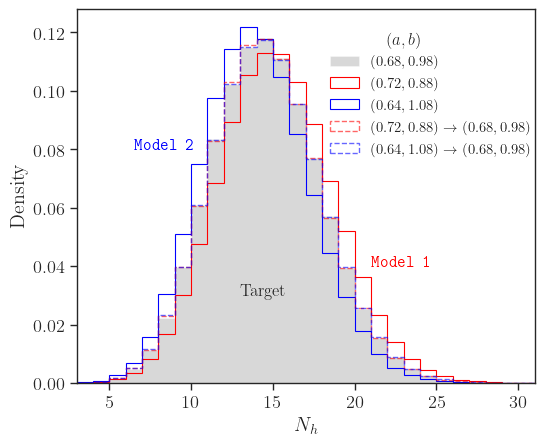

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Extract minimum and maximum bin counts
min_count = min(min(mult_target), min(mult_base_v1), min(mult_base_v2))
max_count = max(max(mult_target), max(mult_base_v1), max(mult_base_v2))

# Create bins
bins = np.linspace(min_count, max_count, int(max_count - min_count + 1))

counts, bins, _ = ax.hist(mult_target, bins = bins, histtype='stepfilled', color='gray', alpha = 0.3, label=r'$(0.68, 0.98)$', density=True)
ax.hist(mult_base_v1, bins=bins, histtype='step', color='red',  density=True, label=r'$(0.72, 0.88)$')
ax.hist(mult_base_v2, bins=bins, histtype='step', color='blue', density=True, label=r'$(0.64, 1.08)$')

ax.hist(mult_base_v1, bins=bins, histtype='step', color='red', label=r'$(0.72, 0.88) \to (0.68, 0.98)$', density=True, alpha = 0.6, weights=weights_base_v1, linewidth = 1.0, linestyle='--')
ax.hist(mult_base_v2, bins=bins, histtype='step', color='blue',label=r'$(0.64, 1.08) \to (0.68, 0.98)$', density=True, alpha = 0.6, weights=weights_base_v2, linewidth = 1.0, linestyle='--')

ax.set_xlabel(r'$N_h$')
ax.set_ylabel(r'$\mathrm{Density}$')

ax.set_xlim(3, 31)

ax.legend(frameon=False, fontsize = 10.5, ncols = 1, bbox_to_anchor=(0.525,.57))
ax.text(22, 0.116, r'$(a,b)$', fontsize = 12)
ax.text(13, 0.03, r'$\mathrm{Target}$', fontsize = 12)
ax.text(6.5, 0.08, r'$\texttt{Model 2}$', color = 'blue', fontsize = 12)
ax.text(21, 0.04, r'$\texttt{Model 1}$', color = 'red', fontsize = 12)
fig.tight_layout()
fig.savefig('multiplicity.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [7]:
# Path to reweighting metrics
base_1_PATH = "./reweighting_metrics_figs/data/weight_metrics_base_a_0.64_b_1.08_n_5e5.dat"

with open (base_1_PATH, 'r') as f:
    lines = f.readlines()

counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b1 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b1 = np.append(metrics_b1, np.array([metrics_i]), axis = 0)
            type_counter = 0

a = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
b = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
one_minus_mu_b1 = metrics_b1[:,2]
one_minus_mu_b1 = np.reshape(one_minus_mu_b1, (a.shape[0],b.shape[0]))
one_minus_mu_b1 = np.rot90(np.fliplr(one_minus_mu_b1))
Neff_b1 = metrics_b1[:,4]
Neff_b1 = np.reshape(Neff_b1, (a.shape[0],b.shape[0]))
Neff_b1 = np.rot90(np.fliplr(Neff_b1))

In [8]:
# Path to reweighting metrics
base_2_PATH = "./reweighting_metrics_figs/data/weight_metrics_base_a_0.72_b_0.88_n_5e5.dat"

with open (base_2_PATH, 'r') as f:
    lines = f.readlines()

counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b2 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b2 = np.append(metrics_b2, np.array([metrics_i]), axis = 0)
            type_counter = 0

a = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
b = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
one_minus_mu_b2 = metrics_b2[:,2]
one_minus_mu_b2 = np.reshape(one_minus_mu_b2, (a.shape[0],b.shape[0]))
one_minus_mu_b2 = np.rot90(np.fliplr(one_minus_mu_b2))
Neff_b2 = metrics_b2[:,4]
Neff_b2 = np.reshape(Neff_b2, (a.shape[0],b.shape[0]))
Neff_b2 = np.rot90(np.fliplr(Neff_b2))

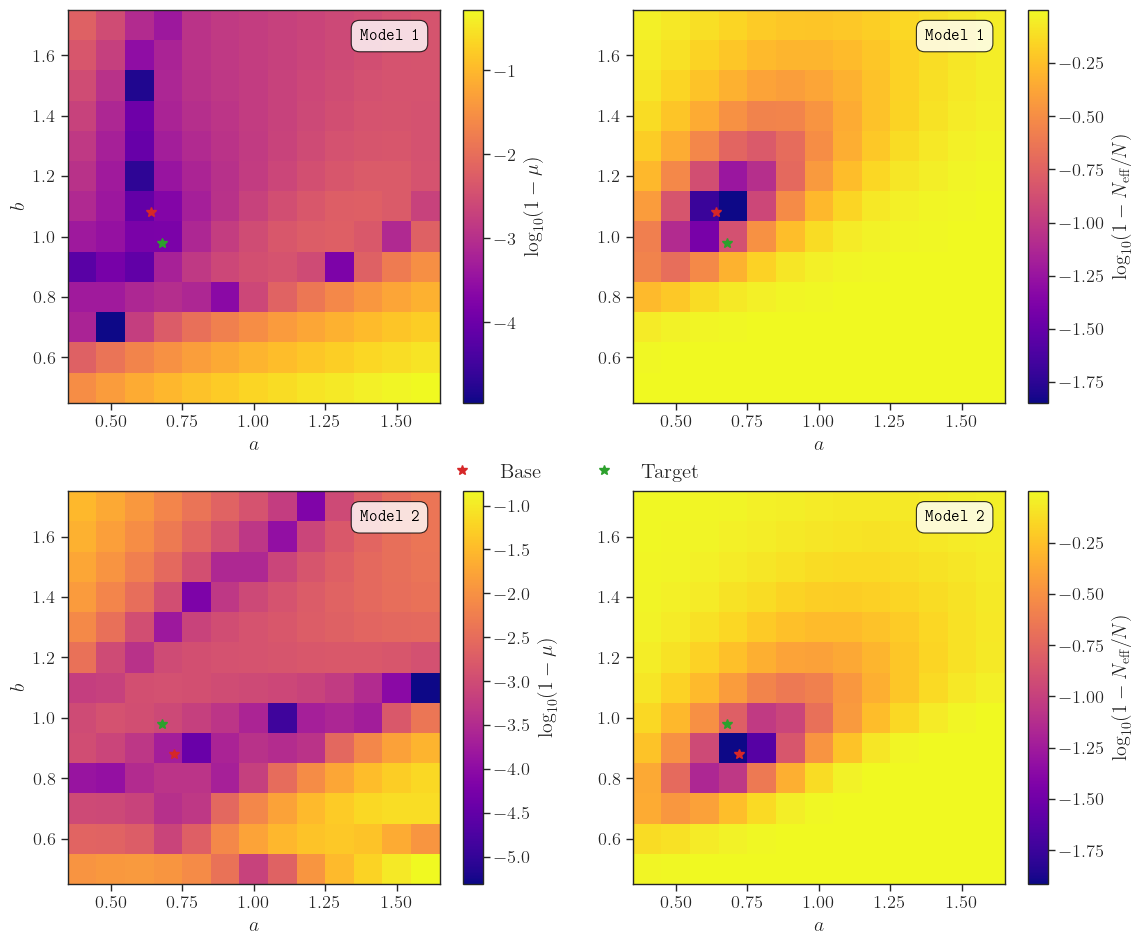

In [9]:
# Make composite figure
fig, axs = plt.subplots(2, 2, figsize=(12,10))
mesh1 = axs[0,0].pcolormesh(a, b, np.log10(one_minus_mu_b1), shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
mesh2 = axs[0,1].pcolormesh(a, b, np.log10(1-Neff_b1), shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
axs[0,0].plot(0.64, 1.08, marker = '*', color = 'tab:red', markersize = 7)
axs[0,1].plot(0.64, 1.08, marker = '*', color = 'tab:red', markersize = 7)
axs[0,0].set_xlabel(r'$a$')
axs[0,0].set_ylabel(r'$b$')
axs[0,1].set_xlabel(r'$a$')

mesh3 = axs[1,0].pcolormesh(a, b, np.log10(one_minus_mu_b2), shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
mesh4 = axs[1,1].pcolormesh(a, b, np.log10(1-Neff_b2), shading='nearest', cmap = 'plasma', label = r'$\texttt{Model 1}$')
axs[1,0].plot(0.72, 0.88, marker = '*', color = 'tab:red', markersize = 7)
axs[1,1].plot(0.72, 0.88, marker = '*', color = 'tab:red', markersize = 7)
axs[1,0].set_xlabel(r'$a$')
axs[1,0].set_ylabel(r'$b$')
axs[1,1].set_xlabel(r'$a$')

# Place target points
axs[0,0].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 7)
axs[0,1].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 7)
axs[1,0].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 7)
axs[1,1].plot(0.68, 0.98, marker = '*', color = 'tab:green', markersize = 7)

axs[0,0].text(1.37, 1.65, r'$\texttt{Model 1}$', color='black', fontsize = 12,
        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))

axs[0,1].text(1.37, 1.65, r'$\texttt{Model 1}$', color='black', fontsize = 12,
        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))

axs[1,0].text(1.37, 1.65, r'$\texttt{Model 2}$', color='black', fontsize = 12,
        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))
axs[1,1].text(1.37, 1.65, r'$\texttt{Model 2}$', color='black', fontsize = 12,
        bbox=dict(facecolor='white', alpha = 0.8, edgecolor='black', boxstyle='round,pad=0.5'))

# Custom legend
from matplotlib.lines import Line2D

legend = [Line2D([0], [0], marker='*', markersize = 7, linewidth = 0.0, color = 'tab:red', label = r'$ij=\mu e$'),
          Line2D([0], [0], marker='*', markersize = 7, linewidth = 0.0, color = 'tab:green', label = r'$ij=\mu e$')]

# Create the figure
#fig.legend(frameon = False)
fig.legend(legend, [r'$\mathrm{Base}$', r'$\mathrm{Target}$'], frameon = False, fontsize=15, ncols = 2, loc = 'center')#, borderpad=2.0)

fig.colorbar(mesh1, ax=axs[0,0], label=r'$\log_{10}(1-\mu)$')
fig.colorbar(mesh2, ax=axs[0,1], label=r'$\log_{10}(1-N_{\mathrm{eff}} / N)$')
fig.colorbar(mesh3, ax=axs[1,0], label=r'$\log_{10}(1-\mu)$')
fig.colorbar(mesh4, ax=axs[1,1], label=r'$\log_{10}(1-N_{\mathrm{eff}} / N)$')
fig.tight_layout()
fig.savefig(r'reweighting_metrics.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')